# K-Means Algorithm Demo

_Source: 🤖[Homemade Machine Learning](https://github.com/trekhleb/homemade-machine-learning) repository_

> ☝Before moving on with this demo you might want to take a look at:
> - 📗[Math behind the K-Means Algorithm](https://github.com/trekhleb/homemade-machine-learning/tree/master/homemade/k_means)
> - ⚙️[K-Means Algorithm Source Code](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/k_means/k_means.py)

**K-means clustering** aims to partition _n_ observations into _K_ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

![title](./mesarch.png)

In [1]:
# To make debugging of logistic_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of logistic_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('./')

### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [k_means](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/k_means/k_means.py) - custom implementation of K-Means algorithm

In [2]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Import custom k-means implementation.
from homemade.k_means import KMeans

### Load the Data

数据来源于MES 制造管理过程中设备的IoT 收集。通过5G 设备收集数据流进入系统进行运算。
平台使用KAFKA 作为前端物联网数据的收集。

In [3]:
import sys
!{sys.executable} -m pip install kafka-python

Defaulting to user installation because normal site-packages is not writeable


In [4]:
#Load Data from kafka
from kafka import KafkaConsumer
consumer = KafkaConsumer(bootstrap_servers='my-cluster-kafka-bootstrap:9092')
consumer.subscribe(['streamdata'])
msg = next(consumer)

from io import StringIO
import pandas as pd
s=str(msg.value,'utf-8')
transdata = StringIO(s) 
data=pd.read_csv(transdata)

# Load the data.
#data = pd.read_csv('./dataresult12316079millinletTemp.csv')

# Print the data table.
print("total lines:", data.size);
data.head(30)
# dftest = pd.read_json('[{"solarcalhub.post_std":"1.756868546549593","solarcalhub.post_maxsqt":"5.883527537856933","column":"OUTDB_MIAN_DB_RAYTEK","solarcalhub.post_rollingvarmax":"5.16128000993738","solarcalhub.post_maxpeaksqt":"1.6799265331950723","solarcalhub.post_logVolatility":"0.018942948994278525","solarcalhub.post_dfa":"0.9795138496780909"}, {"solarcalhub.post_std":"3.1593507287581324","solarcalhub.post_maxsqt":"10.972852487968265","column":"MILLINLETTEMP","solarcalhub.post_rollingvarmax":"13.852365591986425","solarcalhub.post_maxpeaksqt":"3.290883111104079","solarcalhub.post_logVolatility":"0.03236536445490581","solarcalhub.post_dfa":"0.9471421533154122"}, {"solarcalhub.post_std":"0.09275625557712425","solarcalhub.post_maxsqt":"0.2254905958673933","column":"SR_POSITION","solarcalhub.post_rollingvarmax":"0.013432607580830268","solarcalhub.post_maxpeaksqt":"0","solarcalhub.post_logVolatility":"0.28548045647562886","solarcalhub.post_dfa":"1.5463645641102886"}, {"solarcalhub.post_std":"0.6722473149021259","solarcalhub.post_maxsqt":"1.8000868835800616","column":"CASTER_POOL_LEVEL","solarcalhub.post_rollingvarmax":"0.7737658818281329","solarcalhub.post_maxpeaksqt":"0.30843405116102063","solarcalhub.post_logVolatility":"0.18638939239566696","solarcalhub.post_dfa":"1.559439957307513"}, {"solarcalhub.post_std":"0.0015988026828093313","solarcalhub.post_maxsqt":"0.004896569043872487","column":"CASTER_LINESPEED","solarcalhub.post_rollingvarmax":"4.107023411384234e-06","solarcalhub.post_maxpeaksqt":"0","solarcalhub.post_logVolatility":"0.003801594278138662","solarcalhub.post_dfa":"0.7239542305546263"}]')
# dftest.head(30)
# data.to_json(orient='index')


total lines: 8520


,filename,column,avr,var,std,skew,kern,logviola,rollingvarmax,DFA,rollingvarmean,violmax,violmean,maxpeaksqt,Unnamed: 14
0,5550.csv,millinletTemp,863.744110,3.087366,1.757090,0.127967,-0.118871,0.018943,5.161280,0.979514,2.479970,5.883527,1.481444,1.679927,NaN
1,5551.csv,millinletTemp,863.797703,2.767410,1.663554,0.062153,-0.348086,0.017787,4.394257,0.891497,2.273234,4.447802,1.412332,1.526001,NaN
2,5552.csv,millinletTemp,863.744015,2.903806,1.704056,0.084013,0.487382,0.018174,6.377349,0.996471,2.552628,5.901430,1.388344,1.781452,NaN
3,5553.csv,millinletTemp,863.882932,3.492361,1.868786,0.193423,-0.116656,0.019932,5.258999,0.966817,2.947490,6.082835,1.575984,1.599961,NaN
4,5554.csv,millinletTemp,864.011664,3.143501,1.772992,0.217091,0.037112,0.018888,5.576391,1.016957,2.920016,5.584815,1.478182,1.594840,NaN
5,5555.csv,millinletTemp,864.837067,3.544050,1.882565,-0.152580,-0.281152,0.020046,5.576391,1.027948,2.877514,5.256140,1.575533,1.400383,NaN
6,5556.csv,millinletTemp,865.341135,3.867873,1.966691,-0.359354,-0.046214,0.020892,6.777299,1.087793,3.435109,6.019159,1.658891,2.556618,NaN
7,5557.csv,millinletTemp,865.719821,3.542313,1.882103,0.094590,0.230677,0.020064,6.846417,1.055729,2.957667,6.699753,1.555244,1.723979,NaN
8,5558.csv,millinletTemp,866.099481,2.565872,1.601834,-0.097358,-0.379971,0.017066,4.637326,1.027707,2.432753,4.199982,1.357467,1.318181,NaN
9,5559.csv,millinletTemp,866.593505,2.572016,1.603751,0.113377,-0.044126,0.017057,5.013850,0.974966,2.433880,4.784490,1.359781,1.320124,NaN


### Plot the Data

原生产数据特征分布

<Figure size 15840x10800 with 0 Axes>

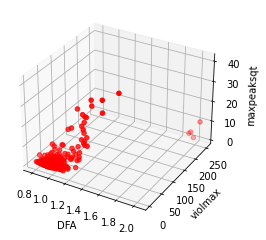

In [5]:
# List of suppported Iris classes.
# iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'DFA'
y_axis = 'violmax'
z_axis = 'maxpeaksqt'

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(220, 150))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the scatter for every type of Iris.
# This is the case when we know flower labels in advance.
# plt.subplot(1, 2, 1)
ax.scatter(data[x_axis][:], data[y_axis][:], data[z_axis][:], c='r', marker='o')

ax.set_xlabel('DFA')
ax.set_ylabel('violmax')
ax.set_zlabel('maxpeaksqt')


# Plot all subplots.
plt.show()

### Prepara the Data for Training

Let's extract `petal_length` and `petal_width` data and form a training feature set.

In [12]:
# Get total number of Iris examples.
num_examples = data.shape[0]

# Get features.
x_train = data[[x_axis, y_axis, z_axis]].values.reshape((num_examples, 3))

### Init and Train Logistic Regression Model

> ☝🏻This is the place where you might want to play with model configuration.

- `num_clusters` - number of clusters into which we want to split our training dataset.
- `max_iterations` - maximum number of training iterations.

In [13]:
# Set K-Means parameters.
num_clusters = 4  # Number of clusters into which we want to split our training dataset.
max_iterations = 50  # maximum number of training iterations.

# Init K-Means instance.
k_means = KMeans(x_train, num_clusters)

# Train K-Means instance.
(centroids, closest_centroids_ids) = k_means.train(max_iterations)
data_frame = pd.DataFrame(centroids,columns=[x_axis,y_axis,z_axis]) 
A = list(item for item in range(0,len(centroids)))
data_frame['A'] = pd.Series(A, index=data_frame.index)
dfsort = data_frame.sort_values(by=[x_axis])
print(centroids)

L=[chr(i) for i in range(97,97+len(centroids))]
dfsort['L'] = pd.Series(L, index=dfsort.index)
Level = list()
for closeid, cetroid in enumerate(closest_centroids_ids):
#     print(closeid)
#     print(cetroid)
    Level.append(dfsort[dfsort.A==cetroid[0]]['L'].values[0][0])


data['L'] =  pd.Series(Level, index=data.index) 
data.to_csv('./dataresult12316079caster_pool_levelmark.csv')


[[  1.33486139  31.45011595  28.29669943]
 [  1.16601553  14.93333339  10.53802302]
 [  0.96853523   5.74722845   2.12218706]
 [  1.97639419 250.33266607   4.90527455]]


# Plot the Clustering Results

Now let's plot the original Iris flow classification along with our unsupervised K-Means clusters to see how the algorithm performed.

<Figure size 8640x3600 with 0 Axes>

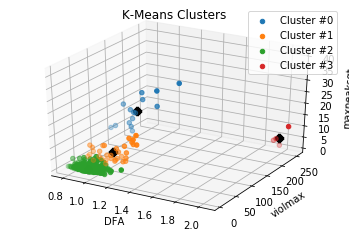

In [14]:
# List of suppported Iris classes.
# iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Pick the Iris parameters for consideration.
x_axis = 'DFA'
y_axis = 'violmax'
z_axis = 'maxpeaksqt'

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(120, 50))

# Plot ACTUAL Iris flower classification.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (closest_centroids_ids == centroid_id).flatten()
#     print(current_examples_indices)
    ax.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        data[z_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plot clusters centroids.
for centroid_id, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], centroid[2], c='black', marker='x', linewidth=8)
    
ax.set_xlabel('DFA')
ax.set_ylabel('violmax')
ax.set_zlabel('maxpeaksqt')
plt.title('K-Means Clusters')
ax.legend()

# Show all subplots.
plt.show()